In [104]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# loading data
credit_card_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [73]:
#showing the data
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [74]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No null values.

now lets check for distribution of ligit & fraudulent transections

In [75]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> ligit transection
1 --> fraud transection
Dataset is unbalanced mean if we train our model using this data it will not give us the desired results.

Here we need to seprate the data.

In [76]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [77]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


some Statistical measures

In [78]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [79]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

By seeing the information about the both type of dataset we can see the difference is quit large.

In [80]:
# Comparing the values for both transections

credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**undersampling** (A technique for dealing with data that has large amoount of data as compared to other data)

Build a sample dataset contaning similar distribution of normal transections and farulent tansections.

in this case we have 284315 ligit and 492 fradu transsectins.(we have to set the fradulent transecttions = 492)

In [81]:
legit_sample = legit.sample( n=492 ) 

# Concatenating data Frames
legit sample and fraud

In [82]:
new_dataset = pd.concat([legit_sample , fraud] , axis=0)
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189505,128430.0,-0.827478,-0.374988,1.178118,1.280860,0.677862,0.185613,0.148679,0.332665,0.137185,...,-0.269450,-0.958108,0.471536,-0.507232,-0.780075,-1.001876,0.198527,0.219407,100.84,0
44048,41765.0,0.908320,-0.914457,0.841088,0.115228,-0.985045,0.623223,-0.728182,0.372944,1.067559,...,-0.109936,-0.375339,-0.043016,-0.236267,0.005453,0.964123,-0.050006,0.017430,132.56,0
65903,51798.0,-1.420706,-0.684864,1.678676,-2.465659,-1.085675,-0.523205,-1.012475,0.617257,-2.547282,...,0.086614,0.249179,-0.207278,-0.024925,0.464940,-0.171058,0.179490,-0.036423,49.00,0
11368,19828.0,-0.693441,0.362902,2.651711,-1.749294,-0.288551,-0.201163,0.310430,-0.067021,2.665408,...,-0.139206,0.151427,-0.333633,0.007430,0.367123,-0.810258,-0.071310,-0.157226,11.85,0
259344,159071.0,1.998498,-0.748743,-0.772654,0.492435,-0.089238,1.049616,-0.715234,0.199333,-0.264329,...,-0.858360,-1.791108,0.396180,-0.304883,-0.311877,-1.104826,0.074774,-0.029449,43.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [83]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [84]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93136.735772,-0.011927,0.015194,0.060419,0.016471,-0.081816,-0.032815,0.024046,-0.076415,-0.072889,...,0.018300,-0.037277,0.018418,-0.013887,-0.026228,0.008460,-0.010358,0.002213,-0.005247,96.873150
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now we have equal data to train our model. we got a good sample otherwise the mean difference will be very large

# splitting the data into features & tragets

In [85]:
X = new_dataset.drop(columns='Class' , axis=1)
Y = new_dataset['Class']

In [86]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
189505,128430.0,-0.827478,-0.374988,1.178118,1.280860,0.677862,0.185613,0.148679,0.332665,0.137185,...,0.275112,-0.269450,-0.958108,0.471536,-0.507232,-0.780075,-1.001876,0.198527,0.219407,100.84
44048,41765.0,0.908320,-0.914457,0.841088,0.115228,-0.985045,0.623223,-0.728182,0.372944,1.067559,...,0.115200,-0.109936,-0.375339,-0.043016,-0.236267,0.005453,0.964123,-0.050006,0.017430,132.56
65903,51798.0,-1.420706,-0.684864,1.678676,-2.465659,-1.085675,-0.523205,-1.012475,0.617257,-2.547282,...,-0.005303,0.086614,0.249179,-0.207278,-0.024925,0.464940,-0.171058,0.179490,-0.036423,49.00
11368,19828.0,-0.693441,0.362902,2.651711,-1.749294,-0.288551,-0.201163,0.310430,-0.067021,2.665408,...,-0.145333,-0.139206,0.151427,-0.333633,0.007430,0.367123,-0.810258,-0.071310,-0.157226,11.85
259344,159071.0,1.998498,-0.748743,-0.772654,0.492435,-0.089238,1.049616,-0.715234,0.199333,-0.264329,...,-0.491143,-0.858360,-1.791108,0.396180,-0.304883,-0.311877,-1.104826,0.074774,-0.029449,43.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [87]:
print(Y)

189505    0
44048     0
65903     0
11368     0
259344    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split data into traning data and test data.

to do this we use from *> sklearn.model_selection import train_test_split*


In [88]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , stratify = Y , random_state=2) # 0.2 is 20 data will be reserved for test, 

In [89]:
print(X.shape , X_train.shape , X_test.shape)

(984, 30) (787, 30) (197, 30)


In [90]:
model = RandomForestClassifier(n_estimators = 10)

# Traning model using train data

In [91]:
model.fit(X_train , Y_train)

RandomForestClassifier(n_estimators=10)

# Evaluation

Evaluation on train data .
Accuracy score

In [121]:
# Accuracy score on Train data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [124]:
print('Accuracy score on traning data : ' , training_data_accuracy )

Accuracy score on traning data :  0.9936467598475223


In [122]:
# Accuracy score on Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [123]:
print('Accuracy score on test data : ' , test_data_accuracy )

Accuracy score on test data :  0.9187817258883249


good prediction for test data . means our model is good.
if accuracy scoure is of test and train data does't match it means our model is underfitted or overfittef=d

In [100]:
cm = confusion_matrix(X_test_prediction , Y_test)
cm

array([[95, 12],
       [ 4, 86]])

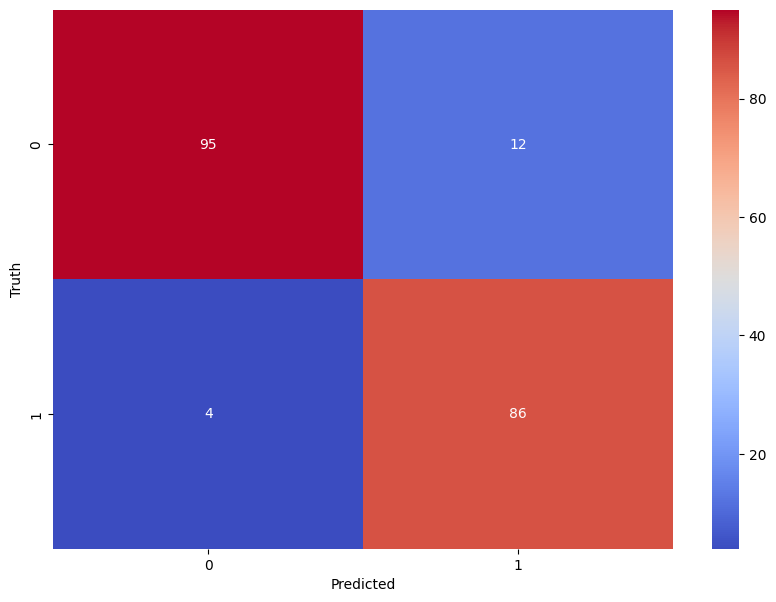

In [119]:
plt.figure(figsize=(10,7));
sns.heatmap( cm, annot=True ,cmap = 'coolwarm');
plt.xlabel('Predicted');
plt.ylabel('Truth');